In [160]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
from pylab import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [161]:
data = pd.read_csv('C://Users//User//Desktop/churn.csv')
data = data.dropna()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,No
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,No


### SKlearn PreProcessing

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [163]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [164]:
data = pd.get_dummies(data, columns=['gender','SeniorCitizen','Partner','Dependents','PaymentMethod',
                                     'PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                      'Contract','PaperlessBilling','Churn'], drop_first = True)
data.head(50)


,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes
0,0002-ORFBO,9,65.60,593.30,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,0003-MKNFE,9,59.90,542.40,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0004-TLHLJ,4,73.90,280.85,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,0011-IGKFF,13,98.00,1237.85,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
4,0013-EXCHZ,3,83.90,267.40,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5,0013-MHZWF,9,69.40,571.45,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
6,0013-SMEOE,71,109.70,7904.25,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
7,0014-BMAQU,63,84.65,5377.80,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1
8,0015-UOCOJ,7,48.20,340.35,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0016-QLJIS,65,90.45,5957.90,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0


In [165]:
# Create separate object for input features
data = data.drop('customerID', axis=1)
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes
0,9,65.6,593.30,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,9,59.9,542.40,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,73.9,280.85,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,13,98.0,1237.85,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
4,3,83.9,267.40,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [166]:

data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')

data['TotalCharges'].head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: TotalCharges, dtype: float64

In [167]:
data = data.apply(pd.to_numeric,errors='coerce')

data.isnull().values.any()

False

In [209]:
import warnings
warnings.filterwarnings('ignore')
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# load dataset
# Create separate object for target variable
y = data.Churn_Yes
# Create separate object for input features
X = data.drop('Churn_Yes', axis=1)
# Split X and y into train and test sets
#30% of Data for testing, stratified random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1234,
                                                    stratify=data.Churn_Yes)

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('CC', CalibratedClassifierCV()))
models.append(('LC', LogisticRegressionCV()))
models.append(('ML', MLPClassifier()))
models.append(('MB', MultinomialNB()))
models.append(('PE', Perceptron()))
models.append(('RC', RidgeClassifierCV()))
models.append(('SG', SGDClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    



LR: 0.734691 (0.115229)
LDA: 0.734691 (0.115229)
KNN: 0.680008 (0.080786)
CART: 0.602892 (0.043664)
NB: 0.701172 (0.098637)
SVM: 0.722759 (0.105175)
AB: 0.733697 (0.114553)
GB: 0.730147 (0.113574)
RF: 0.695204 (0.091259)
ET: 0.678305 (0.079286)
BC: 0.691941 (0.094648)
NB: 0.734549 (0.115056)
CC: 0.734691 (0.115229)
LC: 0.734691 (0.115229)
ML: 0.636824 (0.157992)
MB: 0.657573 (0.089335)
PE: 0.642503 (0.209447)
RC: 0.734691 (0.115229)
SG: 0.555714 (0.255448)


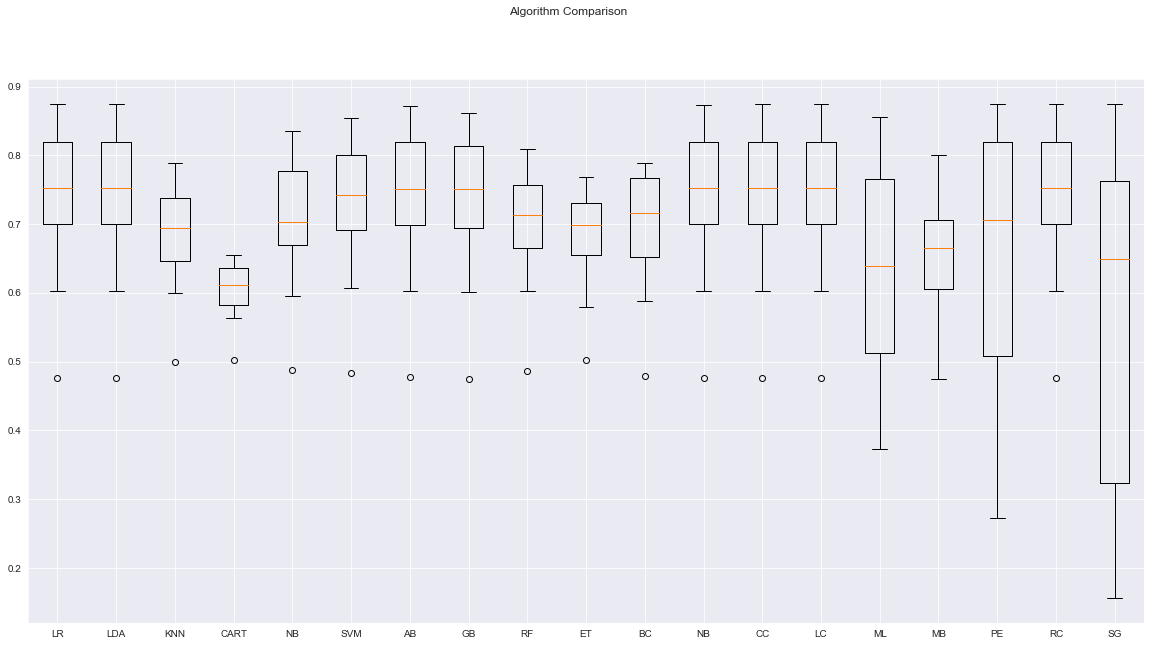

In [217]:
# boxplot algorithm comparison


fig = pyplot.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [220]:
#Ensemble Voting Classification

from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results2 = cross_val_score(ensemble, X, y, cv=kfold)
print(results2.mean())


0.7298619842037396


### XGBOOST

In [224]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import GradientBoostingClassifier as gbc

# load dataset
# Create separate object for target variable
y = data.Churn_Yes
# Create separate object for input features
X = data.drop('Churn_Yes', axis=1)
# Split X and y into train and test sets
#30% of Data for testing, stratified random sampling
gbc_ = gbc()

gbc_.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [225]:
gbc_.score(X_test, y_test)

0.7373402744912447

### Tensorflow Keras

In [226]:
#Neural Net
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [230]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Model Fitting
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

In [231]:
#Evaluation
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Predict
predictions = model.predict(X_test)
# Round predictions
predictions = [round(x[0]) for x in predictions]

2113/2113 [==============================] - ETA:  - 0s 25us/step

acc: 73.31%


In [232]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions, normalize=True, sample_weight=None)
print("Accuracy:" + str(acc * 100) + "%")

[[1546    6]
 [ 558    3]]
             precision    recall  f1-score   support

          0       0.73      1.00      0.85      1552
          1       0.33      0.01      0.01       561

avg / total       0.63      0.73      0.62      2113

Accuracy:73.30809275911027%


(0.4, 1)

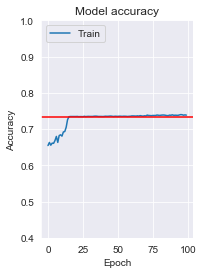

In [233]:
#Plot
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.axhline(y=acc, color='r')
plt.ylim(0.4,1)

### Ensemble 2 Vecstack

In [237]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [243]:
models = [
    LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                           C=1, fit_intercept=True, intercept_scaling=1.0, 
                           class_weight=None, random_state=None),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [244]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.73191489]
    fold  1:  [0.73082386]
    fold  2:  [0.71519886]
    fold  3:  [0.73224432]
    ----
    MEAN:     [0.72754548] + [0.00714768]
    FULL:     [0.72754704]

model  1:     [RandomForestClassifier]
    fold  0:  [0.73191489]
    fold  1:  [0.73224432]
    fold  2:  [0.73224432]
    fold  3:  [0.73224432]
    ----
    MEAN:     [0.73216196] + [0.00014265]
    FULL:     [0.73216187]

model  2:     [XGBClassifier]
    fold  0:  [0.72978723]
    fold  1:  [0.73295455]
    fold  2:  [0.73011364]
    fold  3:  [0.73082386]
    ----
    MEAN:     [0.73091982] + [0.00123309]
    FULL:     [0.73091942]



In [245]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.74449965]
